### Dimensionality reduction with PCA

PCA is a linear transformation method used for dimensionality reduction. PCA yields direction(principal component)  that maximizes the variance of the data

Steps in PCA : 

- Standardize the data.
- Compute the mean and covariance matrix 
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Value Decomposition.
- Sort the eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues ; k is the dimension of new subspace 
- Construct the projection matrix from the selected k eigenvectors.
- Transform the original matrix using the projection matrix 


### Import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score, adjusted_rand_score
%matplotlib inline 

#### Import dataset


In [2]:
df = pd.read_csv("url-data.txt")
label= df['data1']
df.drop(columns= 'data1', inplace = True)

#### Standardize

In [3]:
X_std = StandardScaler().fit_transform(df)

#### Obtain covariance matrix and compute eigen values

In [4]:
# mean_vec = np.mean(X_std, axis=0) # mean 
# cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)# covar

#or perform eigen value decomponsition on covariance matrix 
cov_mat= np.cov(X_std.T)
#obtain the eig vector and eigen values 
eig_vals, eig_vecs= np.linalg.eig(cov_mat)
print('Eigenvectors:  \n ', np.abs(eig_vecs))
print('\nEigenvalues:  \n', np.abs(eig_vals))

Eigenvectors:  
  [[0.0157083  0.01817913 0.14410764 ... 0.         0.         0.        ]
 [0.00828268 0.0255889  0.04290383 ... 0.         0.         0.        ]
 [0.02726346 0.036924   0.08912026 ... 0.         0.         0.        ]
 ...
 [0.01083161 0.01580772 0.02148788 ... 0.         0.         0.        ]
 [0.01458693 0.0195976  0.02961555 ... 0.         0.         0.        ]
 [0.08524019 0.23304863 0.02352445 ... 0.         0.         0.        ]]

Eigenvalues:  
 [1.09162631e+01 8.44218907e+00 5.22048771e+00 2.99392430e+00
 2.93627771e+00 2.57511831e+00 2.40609219e+00 2.16093380e+00
 1.82589673e+00 1.36196158e+00 1.32145472e+00 1.17264844e+00
 9.50879151e-01 9.41748024e-01 7.35970460e-01 6.89968024e-01
 6.62050261e-01 6.15232822e-01 5.83306377e-01 4.80921863e-01
 4.45068751e-01 4.06311703e-01 3.58265574e-01 3.47521362e-01
 2.73609312e-01 2.55244615e-01 2.24870461e-01 1.83835178e-01
 1.92600697e-01 1.39165390e-01 7.98213155e-02 6.07582137e-02
 4.01045611e-02 7.90597878e-03 1.

#### PCA

In [5]:
#95% variance
pca = PCA(n_components=0.95, svd_solver='full')
principalComponents = pca.fit_transform(X_std)
print(f'Minimum number of principal components needed for 95% variance: ',pca.n_components_)

Minimum number of principal components needed for 95% variance:  22


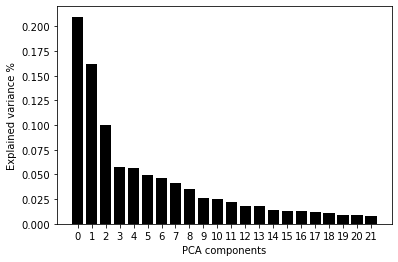

In [6]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA components')
plt.ylabel('Explained variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [7]:
#99% variance
pca = PCA(n_components=0.99, svd_solver='full')
principalComponents = pca.fit_transform(X_std)
print(f'Minimum number of principal components needed for 99% variance: ',pca.n_components_)

Minimum number of principal components needed for 99% variance:  29


#### Scree Plot

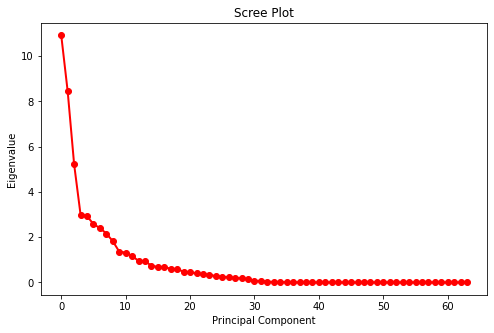

In [8]:
sorted_eig = sorted(np.abs(eig_vals), reverse= True)
fig = plt.figure(figsize=(8,5))
plt.plot(range(pca.n_features_), sorted_eig, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

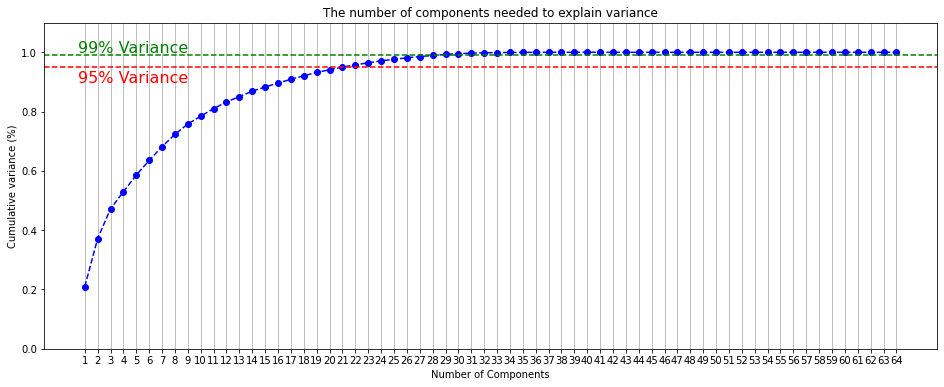

In [9]:
#https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
pca = PCA().fit(X_std)

plt.rcParams["figure.figsize"] = (16,6)

fig, ax = plt.subplots()
xi = np.arange(1,pca.n_components_+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, pca.n_components_+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.9, '95% Variance', color = 'red', fontsize=16)

plt.axhline(y=0.99, color='g', linestyle='--')
plt.text(0.5, 1, '99% Variance', color = 'green', fontsize=16)

ax.grid(axis='x')
plt.show()

We can see from the above plot that `99% Variance` is acheived by using `29` components and `95% vaiance` is acheived by using `22` components

### Clustering with K-means

#### Import Dataset

In [10]:
df2= pd.read_csv("iris.csv", header = None)
df2.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width', 4: 'labels'}, inplace=True)

In [11]:
label= df2['labels']
df2.drop('labels', axis =1, inplace = True)
labels =pd.factorize(label)[0] #convert string to integer labels ( 0, 1, 2)

#### Standardize

In [12]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df2)

#### PCA & K-Means

In [13]:
#https://realpython.com/k-means-clustering-python/
range_n_component = [1, 2, 3, 4]
silhouette_scores = []
ari_scores=[]
for n_component in range_n_component:
    # Create a PCA instance: pca
    pca = PCA(n_components=n_component)
    principalComponents = pca.fit_transform(iris_scaled)

    # Percentage of variance explained for each components
    print(f'\n Explained variance ratio of {n_component} components: %s'% str(pca.explained_variance_ratio_))

    # standardizing the new features again
    scaled = scaler.fit_transform(principalComponents)
    # Create a KMeans instance with 3 clusters: model
    model = KMeans(n_clusters=3, random_state=42)
    
    #predict the tareget label, can also use model.labels_
    cluster_labels = model.fit_predict(scaled)
    
    # The silhouette_score gives the avg value for all the samples or mean(silhouette_samples(scaled,cluster_labels)
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print("For 3 clustes with n_component =", n_component,"The average silhouette_score is :", silhouette_avg)
    
    #adjusted rand index (ARI)- uses true cluster assignments to measure the similarity between true and predicted labels
    ari_kmeans = adjusted_rand_score(labels, model.labels_)
    ari = np.round(ari_kmeans, 2)
    print("For 3 clusters with n_component =", n_component,"The adjusted rand index is :", ari)
    
    # Add metrics to their lists
    silhouette_scores.append(np.round(silhouette_avg,2))
    ari_scores.append(ari)


 Explained variance ratio of 1 components: [0.72962445]
For 3 clustes with n_component = 1 The average silhouette_score is : 0.6754183875905295
For 3 clusters with n_component = 1 The adjusted rand index is : 0.8

 Explained variance ratio of 2 components: [0.72962445 0.22850762]
For 3 clustes with n_component = 2 The average silhouette_score is : 0.479638069711501
For 3 clusters with n_component = 2 The adjusted rand index is : 0.58

 Explained variance ratio of 3 components: [0.72962445 0.22850762 0.03668922]
For 3 clustes with n_component = 3 The average silhouette_score is : 0.3620623397214238
For 3 clusters with n_component = 3 The adjusted rand index is : 0.57

 Explained variance ratio of 4 components: [0.72962445 0.22850762 0.03668922 0.00517871]
For 3 clustes with n_component = 4 The average silhouette_score is : 0.2817204165236246
For 3 clusters with n_component = 4 The adjusted rand index is : 0.59


The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters. 

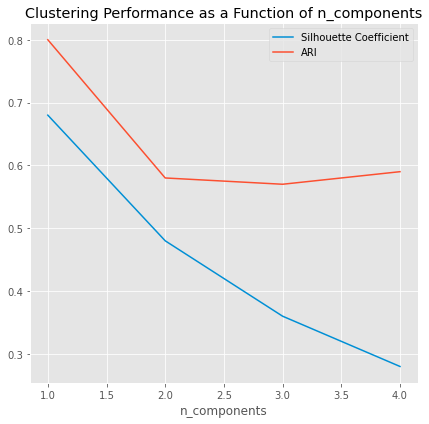

In [14]:
plt.style.use("ggplot")
plt.figure(figsize=(6, 6))
plt.plot(range(1,5),silhouette_scores,c="#008fd5", label="Silhouette Coefficient")
plt.plot(range(1,5), ari_scores, c="#fc4f30", label="ARI")
plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases. 


The ARI improves significantly as you add components.

#### Comments: 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Calculating the silhouette score for the cluster for each the each n_components ranging from 1 to 4 we can see the values of the soilhouette is decreasing as the number of components increase. Therefore the best result is obtained when we use least number of components i.e n_component =1 gave the best clustering result. 

Based on the adjusted rand score we can see that as the n_components increase, we get a higher value for it. Based on the result we can see that the highest rand score was obtained when using 1 cluster and then the value dropped but it showed improvements as we added more components. Therefore we can say that for this problem, n_component =1 would give the best clustering result.

#### References

- https://davetang.org/muse/2017/09/28/rand-index-versus-adjusted-rand-index/
- https://davetang.org/muse/2017/09/21/the-rand-index/
- https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
- https://harvard-iacs.github.io/2019-CS109B/labs/lab7/solutions/
- https://harvard-iacs.github.io/2019-CS109B/pages/materials.html